## Import required modules

In [1]:
# Standard import
import os
import numpy as np
import plotly.graph_objects as go
from numba import njit
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Move to root directory for easier module import
os.chdir("../../")

# LBAE modules
from modules.maldi_data import MaldiData
from modules.figures import Figures
from modules.atlas import Atlas
from modules.tools.volume import fill_array_borders, fill_array_interpolation
from modules.tools.misc import return_db_object


# Objects containing our data as well as the atlas data
data = MaldiData()
atlas = Atlas(data, resolution=25)
figures = Figures(data, atlas)



allen mouse atlas (res. 25um)
From: http://www.brain-map.org (Wang et al 2020, https://doi.org/10.1016/j.cell.2020.04.007 )


In [2]:

def fill_dic_acronym_children_id(dic_acronym_children_id, l_id_leaves):
    older_leave_id = l_id_leaves[0]
    acronym = atlas.bg_atlas.structures[older_leave_id]['acronym']
    for id_leave in l_id_leaves:
        # fill dic with current acronym and id
        if acronym in dic_acronym_children_id:
            dic_acronym_children_id[acronym].add(id_leave)
        else:
            dic_acronym_children_id[acronym] = set([id_leave])
    # while root is not reached, climb back the ancestor tree
    if len(atlas.bg_atlas.structures[older_leave_id]['structure_id_path'])>=2:
        id_parent = atlas.bg_atlas.structures[older_leave_id]['structure_id_path'][-2]
        dic_acronym_children_id = fill_dic_acronym_children_id(dic_acronym_children_id, [id_parent] + l_id_leaves)
    return dic_acronym_children_id
    
dic_acronym_children_id = {}
for id in set(atlas.bg_atlas.annotation.flatten()):
    if id != 0:
        dic_acronym_children_id = fill_dic_acronym_children_id(dic_acronym_children_id, [id])

In [3]:
decrease_dimensionality_factor_root = 7

# get array of annotations, which associate coordinate to id
array_annotation_root = np.array(atlas.bg_atlas.annotation, dtype = np.int32)

# Subsample array of annotation the same way array_atlas was subsampled
array_annotation_root = array_annotation_root[::decrease_dimensionality_factor_root, ::decrease_dimensionality_factor_root, ::decrease_dimensionality_factor_root]

# bug correction for the last slice
array_annotation_root = np.concatenate((array_annotation_root, np.zeros((1,array_annotation_root.shape[1], array_annotation_root.shape[2]), dtype = np.int32)))

#array_atlas_borders_root = fill_array_borders(array_annotation_root, differentiate_borders = False, color_near_borders = False, keep_structure_id = None)

In [4]:
# get array of annotations, which associate coordinate to id
array_reference_root = np.array(atlas.bg_atlas.reference, dtype = np.int32)

# Subsample array of annotation the same way array_atlas was subsampled
array_reference_root = array_reference_root[::decrease_dimensionality_factor_root, ::decrease_dimensionality_factor_root, ::decrease_dimensionality_factor_root]

# bug correction for the last slice
array_reference_root = np.concatenate((array_reference_root, np.zeros((1,array_reference_root.shape[1], array_reference_root.shape[2]))))


In [5]:
decrease_dimensionality_factor = 4

# get array of annotatiobs, which associate coordinate to id
array_annotation = np.array(atlas.bg_atlas.annotation, dtype = np.int32)

# Subsample array of annotation the same way array_atlas was subsampled
array_annotation = array_annotation[::decrease_dimensionality_factor, ::decrease_dimensionality_factor, ::decrease_dimensionality_factor]

# bug correction for the last slice
array_annotation = np.concatenate((array_annotation, np.zeros((1,array_annotation.shape[1], array_annotation.shape[2]))))

# choose structure
#for i, keys in atlas.dic_label_id.items():
#    print(keys, i)

id_structure =  None#atlas.dic_label_id["Substantia innominata"]
array_atlas_borders = fill_array_borders(array_annotation, differentiate_borders = False, color_near_borders = False, keep_structure_id = id_structure)

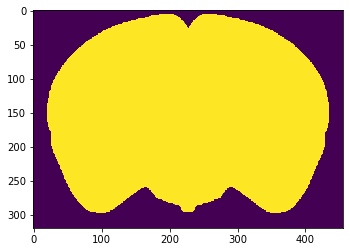

In [6]:
array_to_display = np.array(atlas.bg_atlas.annotation[300,:,:],dtype = np.int32)
plt.imshow(array_to_display , vmin = 0, vmax = 1)
plt.show()

In [7]:
#array_to_display = np.array(array_atlas_borders[30,:,:],dtype = np.float32)
#plt.imshow(array_to_display , vmin = -0.4, vmax = 0)
#plt.show()

size = widgets.IntSlider(value=5, min=0,max=array_atlas_borders.shape[0]-1,step=1, description='Slice')

def hist1(size):
    plt.imshow(array_atlas_borders[size,:,:], vmin = -0.4, vmax = 0)
    return
out = widgets.interactive_output(hist1, {'size':size})

display(size, out)


IntSlider(value=5, description='Slice', max=132)

Output()

In [8]:
from scipy.spatial import Delaunay
import plotly.figure_factory as ff

# Get list of coordinates corresponding to a surface
bool_coor = np.logical_or(array_atlas_borders>=-0.11, array_atlas_borders<=-0.09)
X, Y, Z = np.mgrid[
     0 : array_atlas_borders.shape[0]/1000*25 : array_atlas_borders.shape[0] * 1j,
     0 : array_atlas_borders.shape[1]/1000*25 : array_atlas_borders.shape[1] * 1j,
     0 : array_atlas_borders.shape[2]/1000*25 : array_atlas_borders.shape[2] * 1j,
]

#array_atlas_borders = array_atlas_borders[bool_coor]
X = X[bool_coor]
Y = Y[bool_coor]
Z = Z[bool_coor]
array = np.vstack((X,Y,Z)).T


In [9]:
#print(array_annotation_root[20,20,:])
for keys in atlas.dic_name_acronym:
    if "nigra" in keys:
        print(keys)

for keys in atlas.dic_name_acronym:
    if "brain" in keys:
        print(keys)
        
#print(atlas.dic_name_acronym['Substantia nigra'])
print(atlas.dic_acronym_children_id[atlas.dic_name_acronym['Substantia nigra, reticular part']])
print(atlas.dic_acronym_children_id[atlas.dic_name_acronym['Substantia nigra, compact part']])
print(atlas.dic_acronym_children_id[atlas.dic_name_acronym['Hindbrain']])



Substantia nigra, reticular part
Paranigral nucleus
Substantia nigra, compact part
Interbrain
Midbrain
Midbrain, sensory related
Midbrain trigeminal nucleus
Midbrain, motor related
Midbrain reticular nucleus, retrorubral area
Midbrain reticular nucleus
Midbrain, behavioral state related
Midbrain raphe nuclei
Hindbrain
lateral forebrain bundle system
medial forebrain bundle system
medial forebrain bundle
{381}
{374}
{7, 1039, 534, 1048, 1065, 1069, 574, 576, 1093, 1098, 83, 1107, 604, 1117, 607, 96, 612, 101, 105, 106, 1132, 621, 114, 122, 123, 642, 135, 136, 651, 653, 143, 146, 147, 661, 154, 162, 679, 169, 599626927, 177, 701, 711, 202, 203, 206, 207, 720, 209, 217, 222, 225, 230, 235, 238, 765, 771, 773, 781, 280, 307, 318, 549009215, 549009219, 839, 549009223, 549009227, 852, 859, 350, 354, 867, 589508451, 358, 880, 370, 372, 379, 386, 898, 903, 395, 398, 931, 938, 939, 429, 437, 955, 445, 963, 970, 978, 987}


In [10]:
atlas.dic_acronym_children_id[atlas.dic_name_acronym['Hindbrain']]

{7,
 83,
 96,
 101,
 105,
 106,
 114,
 122,
 123,
 135,
 136,
 143,
 146,
 147,
 154,
 162,
 169,
 177,
 202,
 203,
 206,
 207,
 209,
 217,
 222,
 225,
 230,
 235,
 238,
 280,
 307,
 318,
 350,
 354,
 358,
 370,
 372,
 379,
 386,
 395,
 398,
 429,
 437,
 445,
 534,
 574,
 576,
 604,
 607,
 612,
 621,
 642,
 651,
 653,
 661,
 679,
 701,
 711,
 720,
 765,
 771,
 773,
 781,
 839,
 852,
 859,
 867,
 880,
 898,
 903,
 931,
 938,
 939,
 955,
 963,
 970,
 978,
 987,
 1039,
 1048,
 1065,
 1069,
 1093,
 1098,
 1107,
 1117,
 1132,
 549009215,
 549009219,
 549009223,
 549009227,
 589508451,
 599626927}

In [13]:
def rotate_y(x, y, z, theta):
    w = x+1j*z
    return np.real(np.exp(1j*theta)*w), y, np.imag(np.exp(1j*theta)*w)

x_eye=1.25
y_eye=0.1
z_eye=1.25



@njit
def boost_value_mid_brain(array_reference, array_annotation):
    center_z = int(array_reference_root_to_plot.shape[2]/2)
    center_x = int(array_reference_root_to_plot.shape[0]/2)
    center_y = int(array_reference_root_to_plot.shape[1]/2)
    len_z = array_reference_root_to_plot.shape[2]
    len_x = array_reference_root_to_plot.shape[0]
    len_y = array_reference_root_to_plot.shape[1]
    for x in range(array_annotation.shape[0]):
        for y in range(array_annotation.shape[1]):
            for z in range(array_annotation.shape[2]):
                if array_annotation[x,y,z]!=0 and z>center_z:
                    array_reference[x,y,z]+=(2-  ( np.abs(z - center_z)/len_z + np.abs(x - center_x)/len_x  + np.abs(y - center_y)/len_y    ))**4  *0.01
    return array_reference

@njit
def boost_value_whole_brain(array_reference, array_annotation):
    center_z = int(array_reference_root_to_plot.shape[2]/2)
    center_x = int(array_reference_root_to_plot.shape[0]/2)
    center_y = int(array_reference_root_to_plot.shape[1]/2)
    len_z = array_reference_root_to_plot.shape[2]
    len_x = array_reference_root_to_plot.shape[0]
    len_y = array_reference_root_to_plot.shape[1]
    for x in range(array_annotation.shape[0]):
        for y in range(array_annotation.shape[1]):
            for z in range(array_annotation.shape[2]):
                if array_annotation[x,y,z]!=0:
                    array_reference[x,y,z]+=(2-  ( np.abs(z - center_z)/len_z + np.abs(x - center_x)/len_x  + np.abs(y - center_y)/len_y    ))**4  *0.01
    return array_reference

@njit
def boost_value_array_reference(set_id_to_boost, array_reference, array_annotation, boost_value):
    set_id_to_boost = set(set_id_to_boost)
    for x in range(array_annotation.shape[0]):
        for y in range(array_annotation.shape[1]):
            for z in range(array_annotation.shape[2]):
                if array_annotation[x,y,z] in set_id_to_boost:
                    array_reference[x,y,z]+=boost_value
    return array_reference

@njit
def clean_brain(array_reference, array_annotation):
    for x in range(array_annotation.shape[0]):
        for y in range(array_annotation.shape[1]):
            for z in range(array_annotation.shape[2]):
                if array_annotation[x,y,z]==0:
                    array_reference[x,y,z]=0
    return array_reference    

array_reference_root_to_plot = np.copy(array_reference_root)

# Remove values outside of annotations
array_reference_root_to_plot = clean_brain(array_reference_root_to_plot, array_annotation_root)

# Cap values to 100 initially to prevent too red zones
array_reference_root_to_plot = np.clip(array_reference_root_to_plot, a_min = None, a_max = 250)

# Make substantia nigra very red
array_reference_root_to_plot = boost_value_array_reference(atlas.dic_acronym_children_id[atlas.dic_name_acronym['Substantia nigra, reticular part']], array_reference_root_to_plot, array_annotation_root, 200)
array_reference_root_to_plot = boost_value_array_reference(atlas.dic_acronym_children_id[atlas.dic_name_acronym['Substantia nigra, compact part']], array_reference_root_to_plot, array_annotation_root, 200)
array_reference_root_to_plot = boost_value_array_reference(np.array(list(atlas.dic_acronym_children_id[atlas.dic_name_acronym['Hindbrain']]), dtype = np.int64), array_reference_root_to_plot, array_annotation_root, 100)

time_domain = np.arange(0, 150, 0.1)
l_fig = []
for image, t in enumerate(time_domain):

    # At each iteration, make hindbrain redder
    array_reference_root_to_plot = boost_value_array_reference(np.array(list(atlas.dic_acronym_children_id[atlas.dic_name_acronym['Hindbrain']]), dtype = np.int64), array_reference_root_to_plot, array_annotation_root, 0.3)

    center_z = int(array_reference_root_to_plot.shape[2]/2)
    len_z = array_reference_root_to_plot.shape[2]    
    # At each iteration, make mid and whole brain redder
    array_reference_root_to_plot = boost_value_mid_brain(array_reference_root_to_plot, array_annotation_root)
    array_reference_root_to_plot = boost_value_whole_brain(array_reference_root_to_plot, array_annotation_root)

    X_root, Y_root, Z_root = np.mgrid[
          0 : array_reference_root_to_plot.shape[0]/1000*25 *decrease_dimensionality_factor_root : array_reference_root.shape[0] * 1j,
          0 : array_reference_root_to_plot.shape[1]/1000*25*decrease_dimensionality_factor_root : array_reference_root.shape[1] * 1j,
          0 : array_reference_root_to_plot.shape[2]/1000*25 *decrease_dimensionality_factor_root: array_reference_root.shape[2] * 1j,
    ]

    #if t<30:
    #    continue
    #print("Computing figure")
    brain_root_data = go.Volume(
                x=X_root.flatten(),
                y=Y_root.flatten()[::-1],
                z=Z_root.flatten(),
                value=array_reference_root_to_plot.flatten(),
                isomin=10,
                isomax=400,
                opacity=0.15,  # max opacity
                #opacityscale=[[-0.0, 0], [1., 1]],
                opacityscale="uniform",
                surface_count=10,
                colorscale='Rdbu_r',#colorscale,
                #flatshading = True,
            )
    
    fig = go.Figure(data = brain_root_data)
    fig.update_traces(showscale=False)

    fig.update_layout(
        margin=dict(t=0, r=0, b=0, l=0),
        scene=dict(
            xaxis=dict(backgroundcolor="rgba(0,0,0,0)",color="white", gridcolor="white"),
            yaxis=dict(backgroundcolor="rgba(0,0,0,0)",color="white", gridcolor="white"),
            zaxis=dict(backgroundcolor="rgba(0,0,0,0)",color="white", gridcolor="white"),
        ),
    )
    
    xe, ye, ze = rotate_y(x_eye, y_eye, z_eye, -t/20)
    camera = dict(
        up=dict(x=0, y=1, z=0),
        center=dict(x=0, y=0, z=0),
        eye=dict(x=xe, y=ye, z=ze),
    )
        
    
        
    fig.update_layout(scene_camera=camera)
    l_fig.append((image,fig))
    



/home/colas/miniconda3/lib/python3.9/site-packages/numba/core/ir_utils.py:2139: NumbaPendingDeprecationWarning:


Encountered the use of a type that is scheduled for deprecation: type 'reflected set' found for argument 'set_id_to_boost' of function 'boost_value_array_reference'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../../../tmp/ipykernel_430436/2504775683.py", line 41:
<source missing, REPL/exec in use?>




In [14]:
from multiprocessing import Pool
multiprocessing = True

def write_figure(t_fig):
    image,fig = t_fig
    fig.write_image("notebooks/tests/images/fig" + format(image,'04d')+".png")
    
if multiprocessing:
    with Pool(processes=16) as pool:
        [x for x in pool.map(write_figure, l_fig)]
        
else:
    for image,fig in l_fig:
        print("Plotting figure " + image)
        fig.write_image("notebooks/tests/images/fig" + format(image,'04d')+".png")
        #break

In [ ]:
X_root, Y_root, Z_root = np.mgrid[
      0 : array_atlas_borders_root.shape[0]/1000*25 *decrease_dimensionality_factor_root : array_atlas_borders_root.shape[0] * 1j,
      0 : array_atlas_borders_root.shape[1]/1000*25*decrease_dimensionality_factor_root : array_atlas_borders_root.shape[1] * 1j,
      0 : array_atlas_borders_root.shape[2]/1000*25 *decrease_dimensionality_factor_root: array_atlas_borders_root.shape[2] * 1j,
]

brain_root_data = go.Isosurface(
            x=X_root.flatten(),#[[1,2,3], [1,2,3], [1,2,3]],
            y=Y_root.flatten(),#[[1,2,3], [1,2,3], [1,2,3]],
            z=Z_root.flatten(),#[[1,1,1], [2,2,2], [3,3,3]],
            value=array_atlas_borders_root.flatten(),
            isomin=-0.21,
            isomax=2.55,
            opacity=0.15,  # max opacity
            #opacityscale=[[-0.0, 0], [1., 1]],
            #opacityscale = "uniform",
            surface_count=2,
            colorscale='Blues',#colorscale,
            flatshading = True,
        )


plot_fig = False
if plot_fig:
    fig = go.Figure(data = brain_root_data)

    fig.update_layout(
        margin=dict(t=0, r=0, b=0, l=0),
        scene=dict(
            xaxis=dict(backgroundcolor="rgba(0,0,0,0)", color="grey", gridcolor="grey"),
            yaxis=dict(backgroundcolor="rgba(0,0,0,0)", color="grey", gridcolor="grey"),
            zaxis=dict(backgroundcolor="rgba(0,0,0,0)", color="grey", gridcolor="grey"),
        ),
    )
    fig.show()

In [ ]:
ll_t_bounds = [
    [None, None, None],
    [[(759.6073, 759.6117)], None, None],
    [[(759.6071000000001, 759.6112)], None, None],
    [[(759.6068, 759.6106000000001)], None, None],
    [[(759.6069, 759.6111000000001)], None, None],
    [[(759.6064, 759.6108)], None, None],
    [[(759.6066000000001, 759.611)], None, None],
    [[(759.6067, 759.611)], None, None],
    [[(759.6066000000001, 759.611)], None, None],
    [[(759.6067, 759.6111000000001)], None, None],
    [[(759.6067, 759.6115000000001)], None, None],
    [[(759.6067, 759.611)], None, None],
    [[(759.6066000000001, 759.6111000000001)], None, None],
    [[(759.6067, 759.6112)], None, None],
    [[(759.6069, 759.6111000000001)], None, None],
    [[(759.6070000000001, 759.6111000000001)], None, None],
    [[(759.6069, 759.6112)], None, None],
    [[(759.6069, 759.611)], None, None],
    [[(759.6064, 759.611)], None, None],
    [[(759.6066117365762, 759.6111773745573)], None, None],
    [[(759.6067594505706, 759.6111700259931)], None, None],
    [[(759.6064842656122, 759.6111548755334)], None, None],
    [[(759.6074, 759.6112)], None, None],
    [[(759.6067, 759.6109)], None, None],
    [[(759.6067, 759.611)], None, None],
    [[(759.6067, 759.611)], None, None],
    [[(759.6067, 759.6115000000001)], None, None],
    [[(759.6068, 759.6114)], None, None],
    [[(759.6073, 759.6114)], None, None],
    [[(759.6071000000001, 759.6113)], None, None],
    [None, None, None],
    [[(759.6069, 759.6112)], None, None],
]
array_x, array_y, array_z, array_c = figures.compute_array_3D( ll_t_bounds, normalize_independently=True, high_res=False)


In [ ]:
array_slices = np.copy(array_atlas_borders)
array_for_avg = np.full_like(array_atlas_borders,1)
array_x_scaled = array_x * 1000000 / atlas.resolution / decrease_dimensionality_factor
array_y_scaled = array_y * 1000000 / atlas.resolution / decrease_dimensionality_factor
array_z_scaled = array_z * 1000000 / atlas.resolution / decrease_dimensionality_factor

print(np.min(array_x_scaled), np.max(array_x_scaled))
print(np.min(array_y_scaled), np.max(array_y_scaled))
print(np.min(array_z_scaled), np.max(array_z_scaled))
print(np.min(array_c), np.max(array_c))
print(array_slices.shape)
for x, y, z, c in zip(array_x_scaled, array_y_scaled, array_z_scaled, array_c):
    x_scaled = int(round(y))
    y_scaled = int(round(z))
    z_scaled = int(round(x))
    # if inside the brain but not a border
    if array_slices[x_scaled, y_scaled, z_scaled ] > -0.05:
        # if inside the brain and not assigned before
        if abs(array_slices[x_scaled, y_scaled, z_scaled ] - (-0.01)) < 10**-4:
            array_slices[x_scaled, y_scaled, z_scaled ] = c/100
        # inside the brain but already assigned, in which case average
        else:
            array_slices[x_scaled, y_scaled, z_scaled ] += c/100
            array_for_avg[x_scaled, y_scaled, z_scaled ] += 1
            
array_slices = array_slices/array_for_avg

In [ ]:
X, Y, Z = np.mgrid[
     0 : array_atlas_borders.shape[0]/1000*25* decrease_dimensionality_factor : array_atlas_borders.shape[0] * 1j,
     0 : array_atlas_borders.shape[1]/1000*25* decrease_dimensionality_factor : array_atlas_borders.shape[1] * 1j,
     0 : array_atlas_borders.shape[2]/1000*25* decrease_dimensionality_factor : array_atlas_borders.shape[2] * 1j,
]

plot = False
if plot:
    fig = go.Figure(
        data=go.Volume(
            x=X.flatten(),
            y=Y.flatten(),
            z=Z.flatten(),
            value=array_slices.flatten(),
            isomin = -1,
            isomax= 2.55,
            opacity=0.5,  # max opacity
            opacityscale="uniform",
            surface_count=10,
            colorscale="RdBu_r",
        )
    )

    fig.update_layout(
        margin=dict(t=0, r=0, b=0, l=0),
        scene=dict(
            xaxis=dict(backgroundcolor="rgba(0,0,0,0)", color="grey", gridcolor="grey"),
            yaxis=dict(backgroundcolor="rgba(0,0,0,0)", color="grey", gridcolor="grey"),
            zaxis=dict(backgroundcolor="rgba(0,0,0,0)", color="grey", gridcolor="grey"),
        ),
    )
    fig.show()


In [ ]:
x_min, x_max, y_min, y_max, z_min, z_max = None, None, None, None, None, None
# Crop unfilled parts to save space
for x in range(0,array_annotation.shape[0]):
    if id_structure in array_annotation[x,:,:]:
        x_min = x-1
        break
for x in range(array_annotation.shape[0]-1,-1,-1):
    if id_structure in array_annotation[x,:,:]:
        x_max = x+1
        break
for y in range(0,array_annotation.shape[1]):
    if id_structure in array_annotation[:,y,:]:
        y_min = y-1
        break
for y in range(array_annotation.shape[1]-1,-1,-1):
    if id_structure in array_annotation[:,y,:]:
        y_max = y+1
        break
for z in range(0,array_annotation.shape[2]):
    if id_structure in array_annotation[:,:,z]:
        z_min = z-1
        break
for z in range(array_annotation.shape[2]-1,-1,-1):
    if id_structure in array_annotation[:,:,z]:
        z_max = z+1
        break

if x_min is None:
    print("Bug, no voxel value has been assigned")
else:
    array_annotation = array_annotation[x_min:x_max+1, y_min:y_max+1, z_min:z_max+1]
    array_slices = array_slices[x_min:x_max+1, y_min:y_max+1, z_min:z_max+1]
    X = X[x_min:x_max+1, y_min:y_max+1, z_min:z_max+1]
    Y = Y[x_min:x_max+1, y_min:y_max+1, z_min:z_max+1]
    Z = Z[x_min:x_max+1, y_min:y_max+1, z_min:z_max+1]

In [ ]:
array_interpolated = fill_array_interpolation(array_annotation, array_slices, divider_radius = 5)
print(np.max(array_interpolated))

In [ ]:
size = widgets.IntSlider(value=5, min=0,max=array_interpolated.shape[0]-1,step=1, description='Slice')

def hist1(size):
    plt.imshow(array_interpolated[size,:,:], vmin = -0.1, vmax = 2.55)
    return
out = widgets.interactive_output(hist1, {'size':size})

display(size, out)

In [ ]:
size = widgets.IntSlider(value=5, min=0,max=array_slices.shape[0]-1,step=1, description='Slice')

def hist1(size):
    plt.imshow(array_slices[size,:,:], vmin = -0.1, vmax = 2.55)
    return
out = widgets.interactive_output(hist1, {'size':size})

display(size, out)

In [ ]:
plot = False
if plot:
    volume_plot = go.Volume(
            x=X.flatten(),
            y=Y.flatten(),
            z=Z.flatten(),
            value=array_interpolated.flatten(),
            isomin = -0.11,
            isomax= 1.5,
            opacity=0.5,  # max opacity
            opacityscale="uniform",
            surface_count=10,
            colorscale='viridis',#"RdBu_r",
            flatshading = False,
            #caps= dict(x_show=False, y_show=False, z_show=False), # no caps
            #cmid=-0.1,
            #cmax = 2.,
            #cmin = -1,
        )
    #brain_root = figures.compute_root_data()#return_db_object("figures/atlas_page/3D", "root", force_update=False, compute_function=figures.compute_root_data)

    fig = go.Figure(
        data=[brain_root_data, volume_plot]#[volume_plot, brain_root]
    )

    fig.update_layout(
        margin=dict(t=0, r=0, b=0, l=0),
        scene=dict(
            xaxis=dict(backgroundcolor="rgba(0,0,0,0)", color="grey", gridcolor="grey"),
            yaxis=dict(backgroundcolor="rgba(0,0,0,0)", color="grey", gridcolor="grey"),
            zaxis=dict(backgroundcolor="rgba(0,0,0,0)", color="grey", gridcolor="grey"),
        ),
    )
    fig.show()